In [1]:
#Importing the necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,log_loss, confusion_matrix


#  Data Analysis: Working on the dataset

### Importing the dataset


In [7]:
# loading the diabetes dataset to a pandas DataFrame
dataset = pd.read_csv("C:/Users/ahmed/OneDrive/Documents/GitHub/SEED_Hackathon/dataset/Cancer.csv") 

### I will do a little bit of inspection and visualization of the dataset.

In [8]:
dataset.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


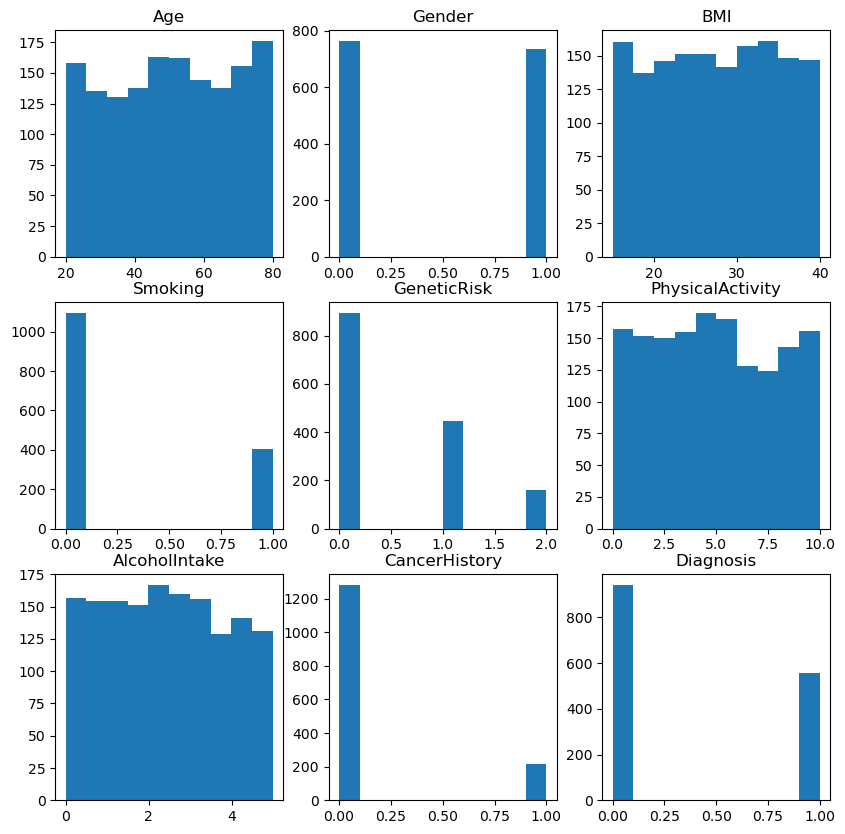

In [9]:
plt.figure(figsize=(10,10))
for index, column in enumerate(dataset.columns):
    plt.subplot(3,3,index+1)
    plt.hist(dataset[column])
    plt.title(column)
    #plt.show()

The dataset seems evenly distributed...
No need for extensive data cleaning and analysis because the dataset seems to have been preprocessed very nicely.

In [13]:
# Spliting the dataset into train and test pandas dataframes
train_split = 1200
train_df = dataset.iloc[:train_split, :]
test_df = dataset.iloc[train_split:, :]

features_indices = len(dataset.columns) - 1
X_df = dataset.iloc[:, :features_indices]
y_df = dataset.iloc[:, -1]

# Nominalize the dataset
X_df_mean = X_df.mean() # mean
X_df_std = X_df.std() # standard deviation

X_df_norm = (X_df - X_df_mean) / X_df_std
X_df_norm.head(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,0.435350,1.018505,-1.580635,-0.606933,0.723725,1.133335,1.219059,2.437310
1,1.172271,-0.981177,0.458570,-0.606933,0.723725,1.557379,0.776215,-0.410015
2,-0.131512,1.018505,1.559024,-0.606933,2.196706,0.082776,1.627810,-0.410015
3,-0.925119,-0.981177,0.349512,-0.606933,-0.749256,1.606630,-0.263050,-0.410015
4,0.662095,1.018505,1.101852,-0.606933,-0.749256,0.160131,0.628374,-0.410015


In [16]:
# Using sklearn to implement random forest algorithm
def train_and_eval_model(model_name: str, X_df: pd.DataFrame, y_df: pd.DataFrame, train_size: float):
    # Turn the dataframes to numpy arrays
    X = np.float64(X_df.values)
    y = np.float64(y_df.values)
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, shuffle=True, random_state=42)

    model = RandomForestClassifier(n_estimators=100, random_state=42)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    auroc = roc_auc_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    confusion_mtx = confusion_matrix(y_test, y_pred)

    return model, {'Model_name': model_name, 'Accuracy': accuracy, 'AUROC': auroc, 'F1Score': f1score, 'Confusion matrix': confusion_mtx}


In [17]:
# Training a model without data normalization
model_0, model_0_metrics = train_and_eval_model(model_name = 'model_0', X_df=X_df, y_df=y_df, train_size=0.8)

# Training a model with data normalization
model_1, model_1_metrics = train_and_eval_model(model_name = 'model_1', X_df=X_df_norm, y_df=y_df, train_size=0.8)

In [18]:
#Compare the results of both models
def compare_models(*model_metrics) -> pd.DataFrame:
    compare_models_df = pd.DataFrame(model_metrics, columns=model_metrics[0].keys())
    compare_models_df.set_index('Model_name', inplace=True)
    return compare_models_df

compare_models(model_0_metrics, model_1_metrics)

,Accuracy,AUROC,F1Score,Confusion matrix
Model_name,,,,
model_0,0.93,0.920633,0.906667,"[[177, 7], [14, 102]]"
model_1,0.93,0.920633,0.906667,"[[177, 7], [14, 102]]"


It seems data normalization doesn't help this model, let's try increasing the size of the train data

In [19]:
# Creating a model with a train_size of 0.9
model_2, model_2_metrics = train_and_eval_model(model_name='model_2', X_df=X_df_norm, y_df=y_df, train_size=0.9)
compare_models(model_0_metrics, model_1_metrics, model_2_metrics)

,Accuracy,AUROC,F1Score,Confusion matrix
Model_name,,,,
model_0,0.930000,0.920633,0.906667,"[[177, 7], [14, 102]]"
model_1,0.930000,0.920633,0.906667,"[[177, 7], [14, 102]]"
model_2,0.953333,0.944444,0.941176,"[[87, 0], [7, 56]]"


Okay, as expected, increasing the size of the train data increased the model's performance.
I will pick the best performing model: `model_2` for inference purposes.

## Making an Interface for users to input some data and get diagnosed by the model for cancer
* I am doing so because I find it as a fun way to test the model on real world situations.

In [20]:
#Creating an Interface for users to input data and get diagnosed for cancer
age = 20 #input('Enter your age: ')
gender = 0 #input('Enter your gender (0 for Male or 1 for Female): ')
bmi = 22 #input('Enter your bmi: ')
smoking = 0 #input('Do you smoke?(0 for No, 1 for Yes) ')
genetic_risk = 1 #input('what is your genetic risk level for cancer(0 for low, 1 for medium, 2 for high) ')
physical_activity = 20 #input('how many hours a week do you spend on physical activities ')
alcohol_intake = 5 #input('how many alcohol units do you consume per week ')
cancer_history = 0 #input('Do you have a personal history of cancer? (0 for No, 1 for Yes) ')

raw_record = [age, gender, bmi, smoking, genetic_risk, physical_activity, alcohol_intake, cancer_history]
record = np.array(raw_record, type(float()))
# we need to apply the same normalization as applied on the data used to train the model.
record = (record - X_df_mean.values)/X_df_std.values
record = record.reshape(1,8)

prediction = model_2.predict(record)
if prediction == 0:
    print('You have been diagnosed to be cancer negative.')
else:
    print('Sorry, you have been diagnosed to be cancer positive.')

You have been diagnosed to be cancer negative.


Saving the trained model

In [30]:
import pickle

In [31]:
filename = 'cancer_model.sav'
pickle.dump(model_2, open(filename, 'wb'))

In [32]:
# loading the saved model
loaded_model = pickle.load(open('cancer_model.sav', 'rb'))

In [33]:
input_data = (20,0,22,0,1,20,5,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('You have been diagnosed to be cancer negative.')
else:
    print('Sorry, you have been diagnosed to be cancer positive.')

[0.]
You have been diagnosed to be cancer negative.


In [35]:
for column in X_df.columns:
  print(column)

Age
Gender
BMI
Smoking
GeneticRisk
PhysicalActivity
AlcoholIntake
CancerHistory
